# Bitcoin wrangling 3 -> Combine data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Ensure plot qualities 
plt.rcParams['figure.figsize'] = (12,6)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300  # Adjust DPI for high-resolution figures

In [3]:
close_prices = pd.read_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/Data/Bitcoin_data_2024_w_TI.csv",
                           index_col=0,
                           parse_dates=True)

close_prices['Returns%'] = np.log(close_prices['Close'] / close_prices['Close'].shift(1))*100
close_prices.dropna(inplace=True)

close_prices

,Open,High,Low,Close,VolumeBTC,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,ROC,CCI,WilliamsR,ADX
date,,,,,,,,,,,,,,
2024-01-01 00:34:00,42357.0,42357.0,42351,42351,0.019690,-0.047213,42439.60,45.249751,39.611671,-21.969636,-0.284894,-132.476899,-100.000000,44.942988
2024-01-01 00:35:00,42359.0,42359.0,42351,42359,0.031363,0.018888,42433.20,47.106900,42.075166,-20.371629,-0.275450,-107.157984,-93.600000,42.503637
2024-01-01 00:36:00,42368.0,42377.0,42356,42377,0.034081,0.042485,42425.65,43.250751,47.285831,-17.279376,-0.183724,-72.268194,-79.200000,39.498642
2024-01-01 00:37:00,42395.0,42411.0,42392,42403,0.005832,0.061335,42421.20,40.698403,53.756702,-12.862734,-0.077764,-8.262512,-58.400000,37.792666
2024-01-01 00:38:00,42403.0,42411.0,42400,42402,0.998563,-0.002358,42417.80,39.295801,53.484759,-9.541278,-0.016506,6.784413,-59.200000,36.208545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,93476.0,93476.0,93471,93471,0.179799,-0.023534,93353.00,82.097503,61.853949,24.510813,0.166102,80.515852,-10.045662,23.141107
2024-12-31 23:56:00,93469.0,93469.0,93469,93469,0.021400,-0.002140,93362.30,84.150520,61.432197,21.537986,0.156446,66.290491,-12.565445,22.308489
2024-12-31 23:57:00,93462.0,93462.0,93413,93427,0.034750,-0.044945,93368.75,83.918338,53.224757,15.865447,0.115732,29.607917,-35.869565,21.254018


In [4]:
# Import fear and greed data 
fear_n_greed = pd.read_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/Data/fear_n_greed_2024.csv",
                               index_col=0,
                               parse_dates=True)
fear_n_greed.rename(columns = {'value': 'fear_n_greed_index'}, inplace = True)
fear_n_greed = fear_n_greed.drop(columns = ['classification'])
fear_n_greed

,fear_n_greed_index
date,
2024-01-01,65
2024-01-02,71
2024-01-03,70
2024-01-04,68
2024-01-05,72
...,...
2024-12-27,74
2024-12-28,72
2024-12-29,73


In [5]:
macro_data = pd.read_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/Data/cleaned_Macro.csv",
                               index_col=0,
                               parse_dates=True)
macro_data

,SP500,CPI,Gold,Nasdaq100,VIX,Oil
date,,,,,,
2023-01-02,NaN,NaN,1823.6899,NaN,NaN,82.82
2023-01-03,3824.14,NaN,1839.4900,10862.64,22.90,80.36
2023-01-04,3852.97,NaN,1854.0900,10914.80,22.01,75.31
2023-01-05,3808.10,NaN,1833.1899,10741.22,22.46,76.73
2023-01-06,3895.08,NaN,1865.7100,11040.35,21.13,76.41
...,...,...,...,...,...,...
2025-03-07,5770.20,NaN,2910.7900,20201.37,23.37,72.49
2025-03-10,5614.56,NaN,NaN,19430.95,27.86,71.08
2025-03-11,5572.07,NaN,NaN,19376.96,26.92,NaN


In [6]:
# Merge price and sentiment data
df = pd.merge(close_prices, fear_n_greed, on='date', how='outer')
df = pd.merge(df, macro_data, on='date', how='outer')

# Display data
df

,Open,High,Low,Close,VolumeBTC,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,...,CCI,WilliamsR,ADX,fear_n_greed_index,SP500,CPI,Gold,Nasdaq100,VIX,Oil
date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1823.6899,NaN,NaN,82.82
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3824.14,NaN,1839.4900,10862.64,22.90,80.36
2023-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3852.97,NaN,1854.0900,10914.80,22.01,75.31
2023-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3808.10,NaN,1833.1899,10741.22,22.46,76.73
2023-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3895.08,NaN,1865.7100,11040.35,21.13,76.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5770.20,NaN,2910.7900,20201.37,23.37,72.49
2025-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5614.56,NaN,NaN,19430.95,27.86,71.08
2025-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5572.07,NaN,NaN,19376.96,26.92,NaN


In [7]:
df.count()

Open                  509330
High                  509330
Low                   509330
Close                 509330
VolumeBTC             509330
Returns%              509330
SMA_20                509330
Volatility_20         509330
RSI                   509330
MACD_Hist             509330
ROC                   509330
CCI                   509330
WilliamsR             509330
ADX                   509330
fear_n_greed_index       365
SP500                    580
CPI                      551
Gold                     577
Nasdaq100                580
VIX                      580
Oil                      578
dtype: int64

In [8]:
print(f"The number of data missing: \n{df.isnull().sum()}")

The number of data missing: 
Open                     400
High                     400
Low                      400
Close                    400
VolumeBTC                400
Returns%                 400
SMA_20                   400
Volatility_20            400
RSI                      400
MACD_Hist                400
ROC                      400
CCI                      400
WilliamsR                400
ADX                      400
fear_n_greed_index    509365
SP500                 509150
CPI                   509179
Gold                  509153
Nasdaq100             509150
VIX                   509150
Oil                   509152
dtype: int64


In [9]:
# Forward-fill missing sentiment scores
df = df.ffill()

# Drop rows with missing data
df = df.dropna()

# Select dates
df = df.loc['2024-01-01':'2024-12-31']

In [10]:
df

,Open,High,Low,Close,VolumeBTC,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,...,CCI,WilliamsR,ADX,fear_n_greed_index,SP500,CPI,Gold,Nasdaq100,VIX,Oil
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:34:00,42357.0,42357.0,42351.0,42351.0,0.019690,-0.047213,42439.60,45.249751,39.611671,-21.969636,...,-132.476899,-100.000000,44.942988,65.0,4742.83,308.417,2062.5901,16543.94,13.20,76.24
2024-01-01 00:35:00,42359.0,42359.0,42351.0,42359.0,0.031363,0.018888,42433.20,47.106900,42.075166,-20.371629,...,-107.157984,-93.600000,42.503637,65.0,4742.83,308.417,2062.5901,16543.94,13.20,76.24
2024-01-01 00:36:00,42368.0,42377.0,42356.0,42377.0,0.034081,0.042485,42425.65,43.250751,47.285831,-17.279376,...,-72.268194,-79.200000,39.498642,65.0,4742.83,308.417,2062.5901,16543.94,13.20,76.24
2024-01-01 00:37:00,42395.0,42411.0,42392.0,42403.0,0.005832,0.061335,42421.20,40.698403,53.756702,-12.862734,...,-8.262512,-58.400000,37.792666,65.0,4742.83,308.417,2062.5901,16543.94,13.20,76.24
2024-01-01 00:38:00,42403.0,42411.0,42400.0,42402.0,0.998563,-0.002358,42417.80,39.295801,53.484759,-9.541278,...,6.784413,-59.200000,36.208545,65.0,4742.83,308.417,2062.5901,16543.94,13.20,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,93476.0,93476.0,93471.0,93471.0,0.179799,-0.023534,93353.00,82.097503,61.853949,24.510813,...,80.515852,-10.045662,23.141107,64.0,5881.63,315.605,2623.8101,21012.17,17.35,74.58
2024-12-31 23:56:00,93469.0,93469.0,93469.0,93469.0,0.021400,-0.002140,93362.30,84.150520,61.432197,21.537986,...,66.290491,-12.565445,22.308489,64.0,5881.63,315.605,2623.8101,21012.17,17.35,74.58
2024-12-31 23:57:00,93462.0,93462.0,93413.0,93427.0,0.034750,-0.044945,93368.75,83.918338,53.224757,15.865447,...,29.607917,-35.869565,21.254018,64.0,5881.63,315.605,2623.8101,21012.17,17.35,74.58


In [11]:
df.count()

Open                  509414
High                  509414
Low                   509414
Close                 509414
VolumeBTC             509414
Returns%              509414
SMA_20                509414
Volatility_20         509414
RSI                   509414
MACD_Hist             509414
ROC                   509414
CCI                   509414
WilliamsR             509414
ADX                   509414
fear_n_greed_index    509414
SP500                 509414
CPI                   509414
Gold                  509414
Nasdaq100             509414
VIX                   509414
Oil                   509414
dtype: int64

In [12]:
df.isna().sum()

Open                  0
High                  0
Low                   0
Close                 0
VolumeBTC             0
Returns%              0
SMA_20                0
Volatility_20         0
RSI                   0
MACD_Hist             0
ROC                   0
CCI                   0
WilliamsR             0
ADX                   0
fear_n_greed_index    0
SP500                 0
CPI                   0
Gold                  0
Nasdaq100             0
VIX                   0
Oil                   0
dtype: int64

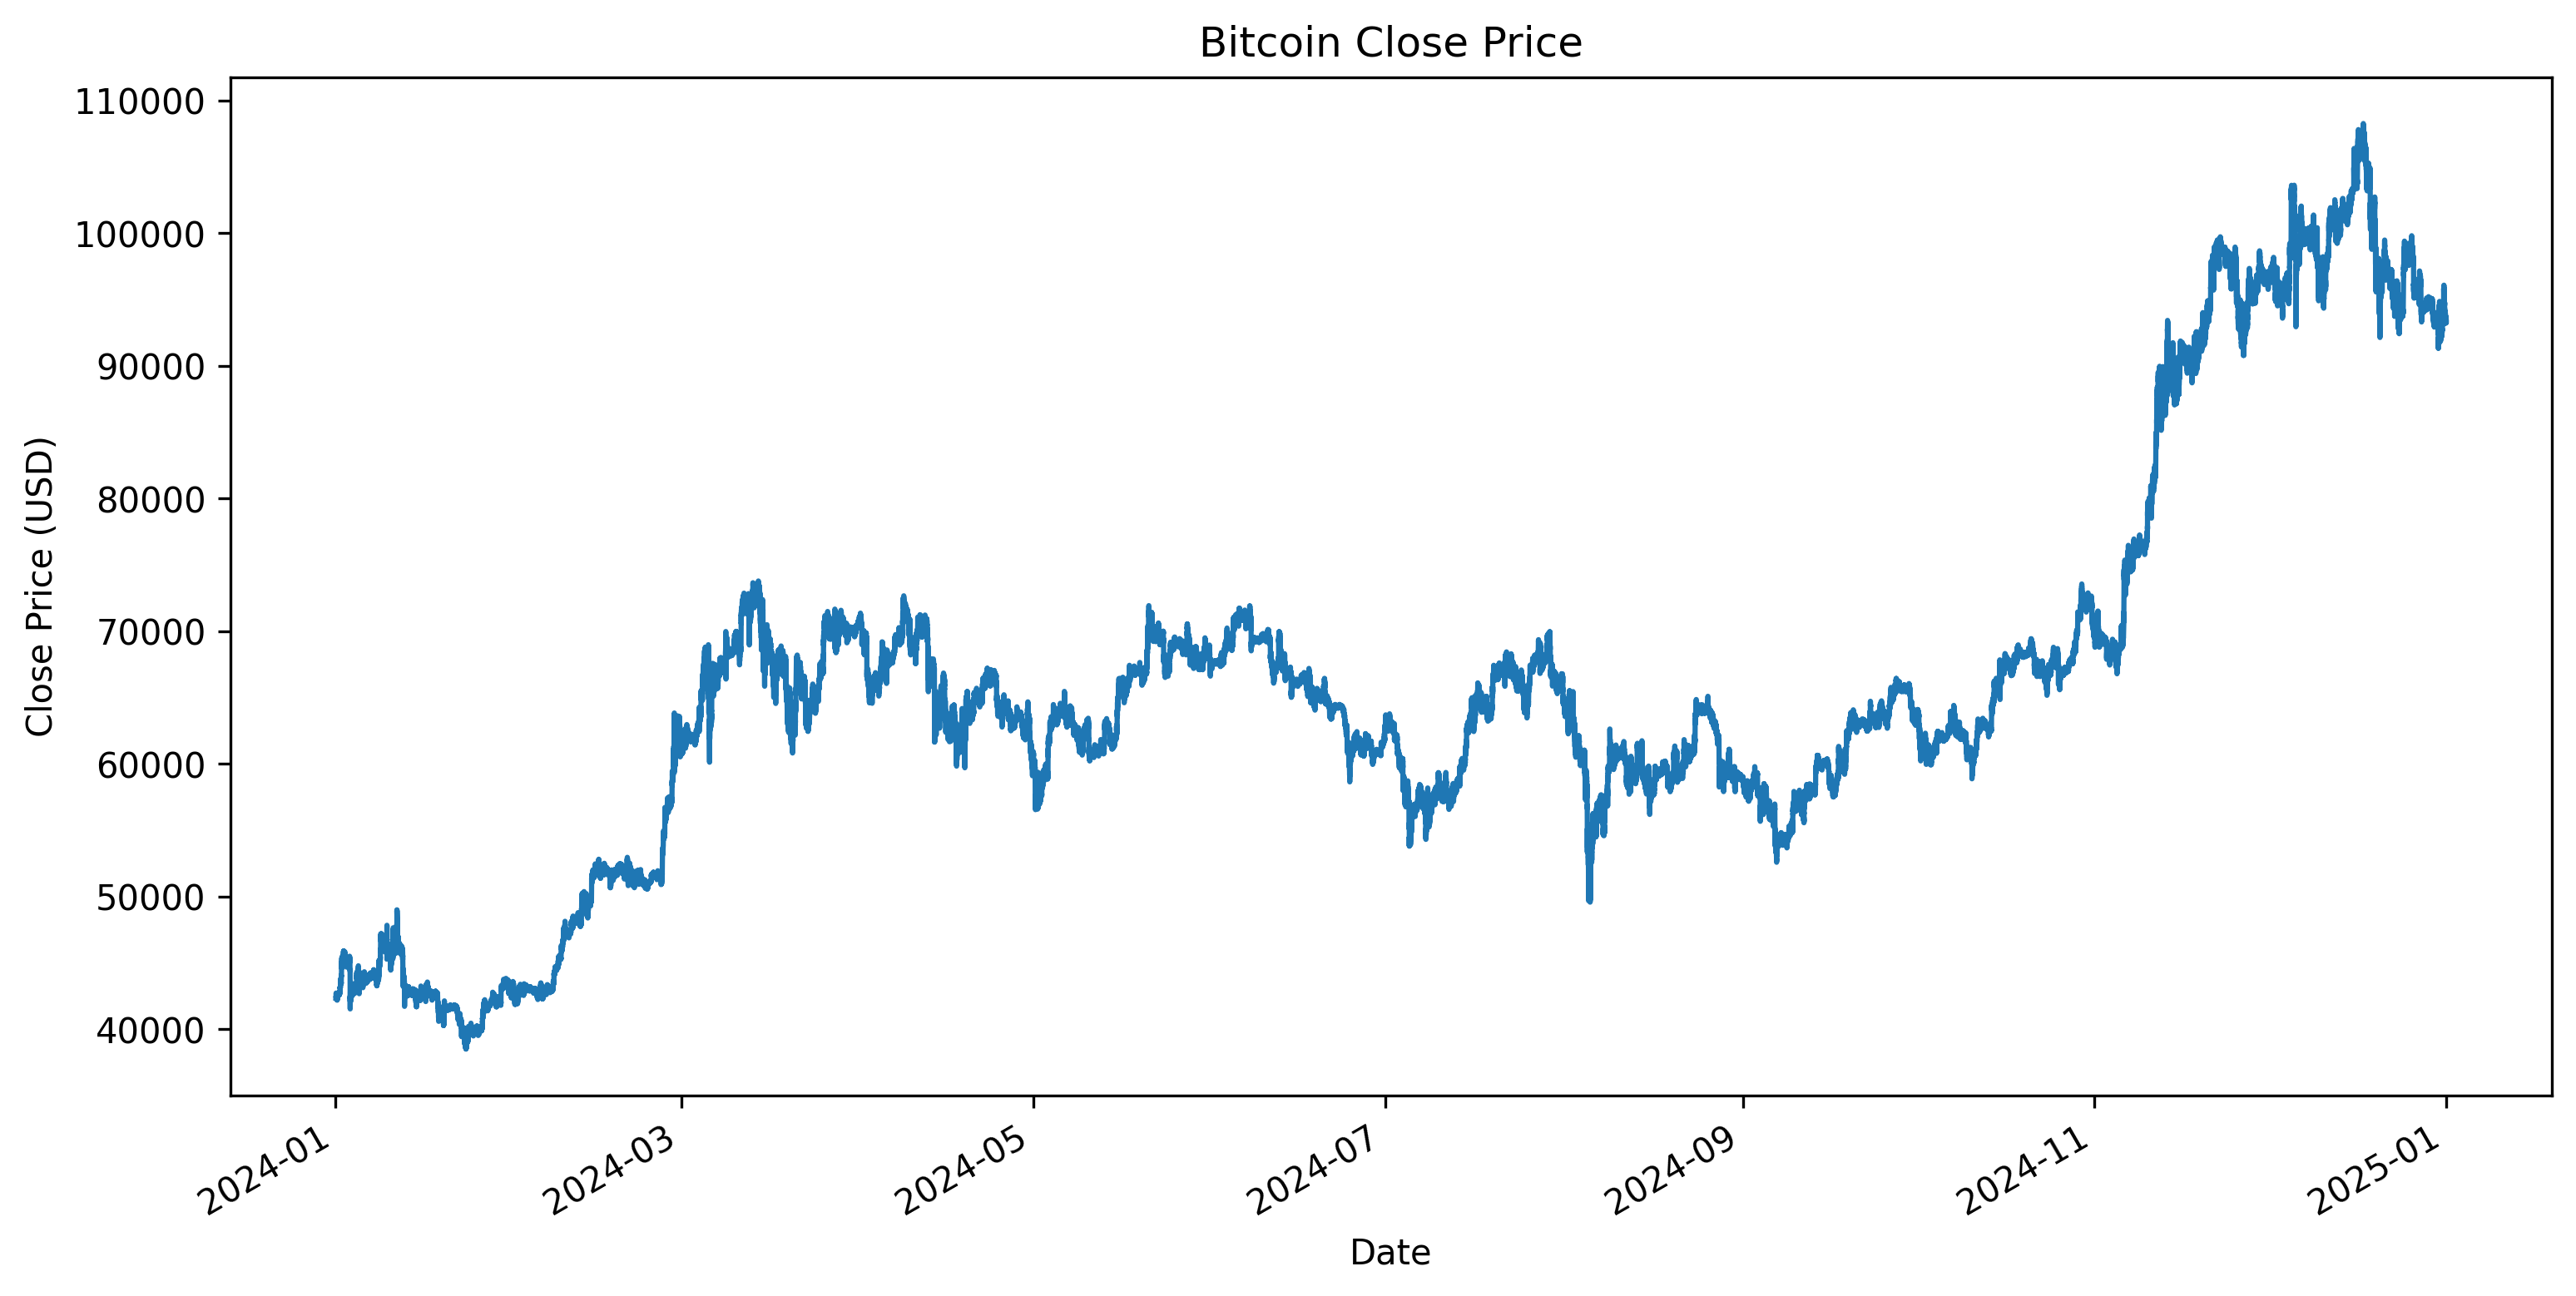

In [13]:
df['Close'].plot()
plt.title('Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

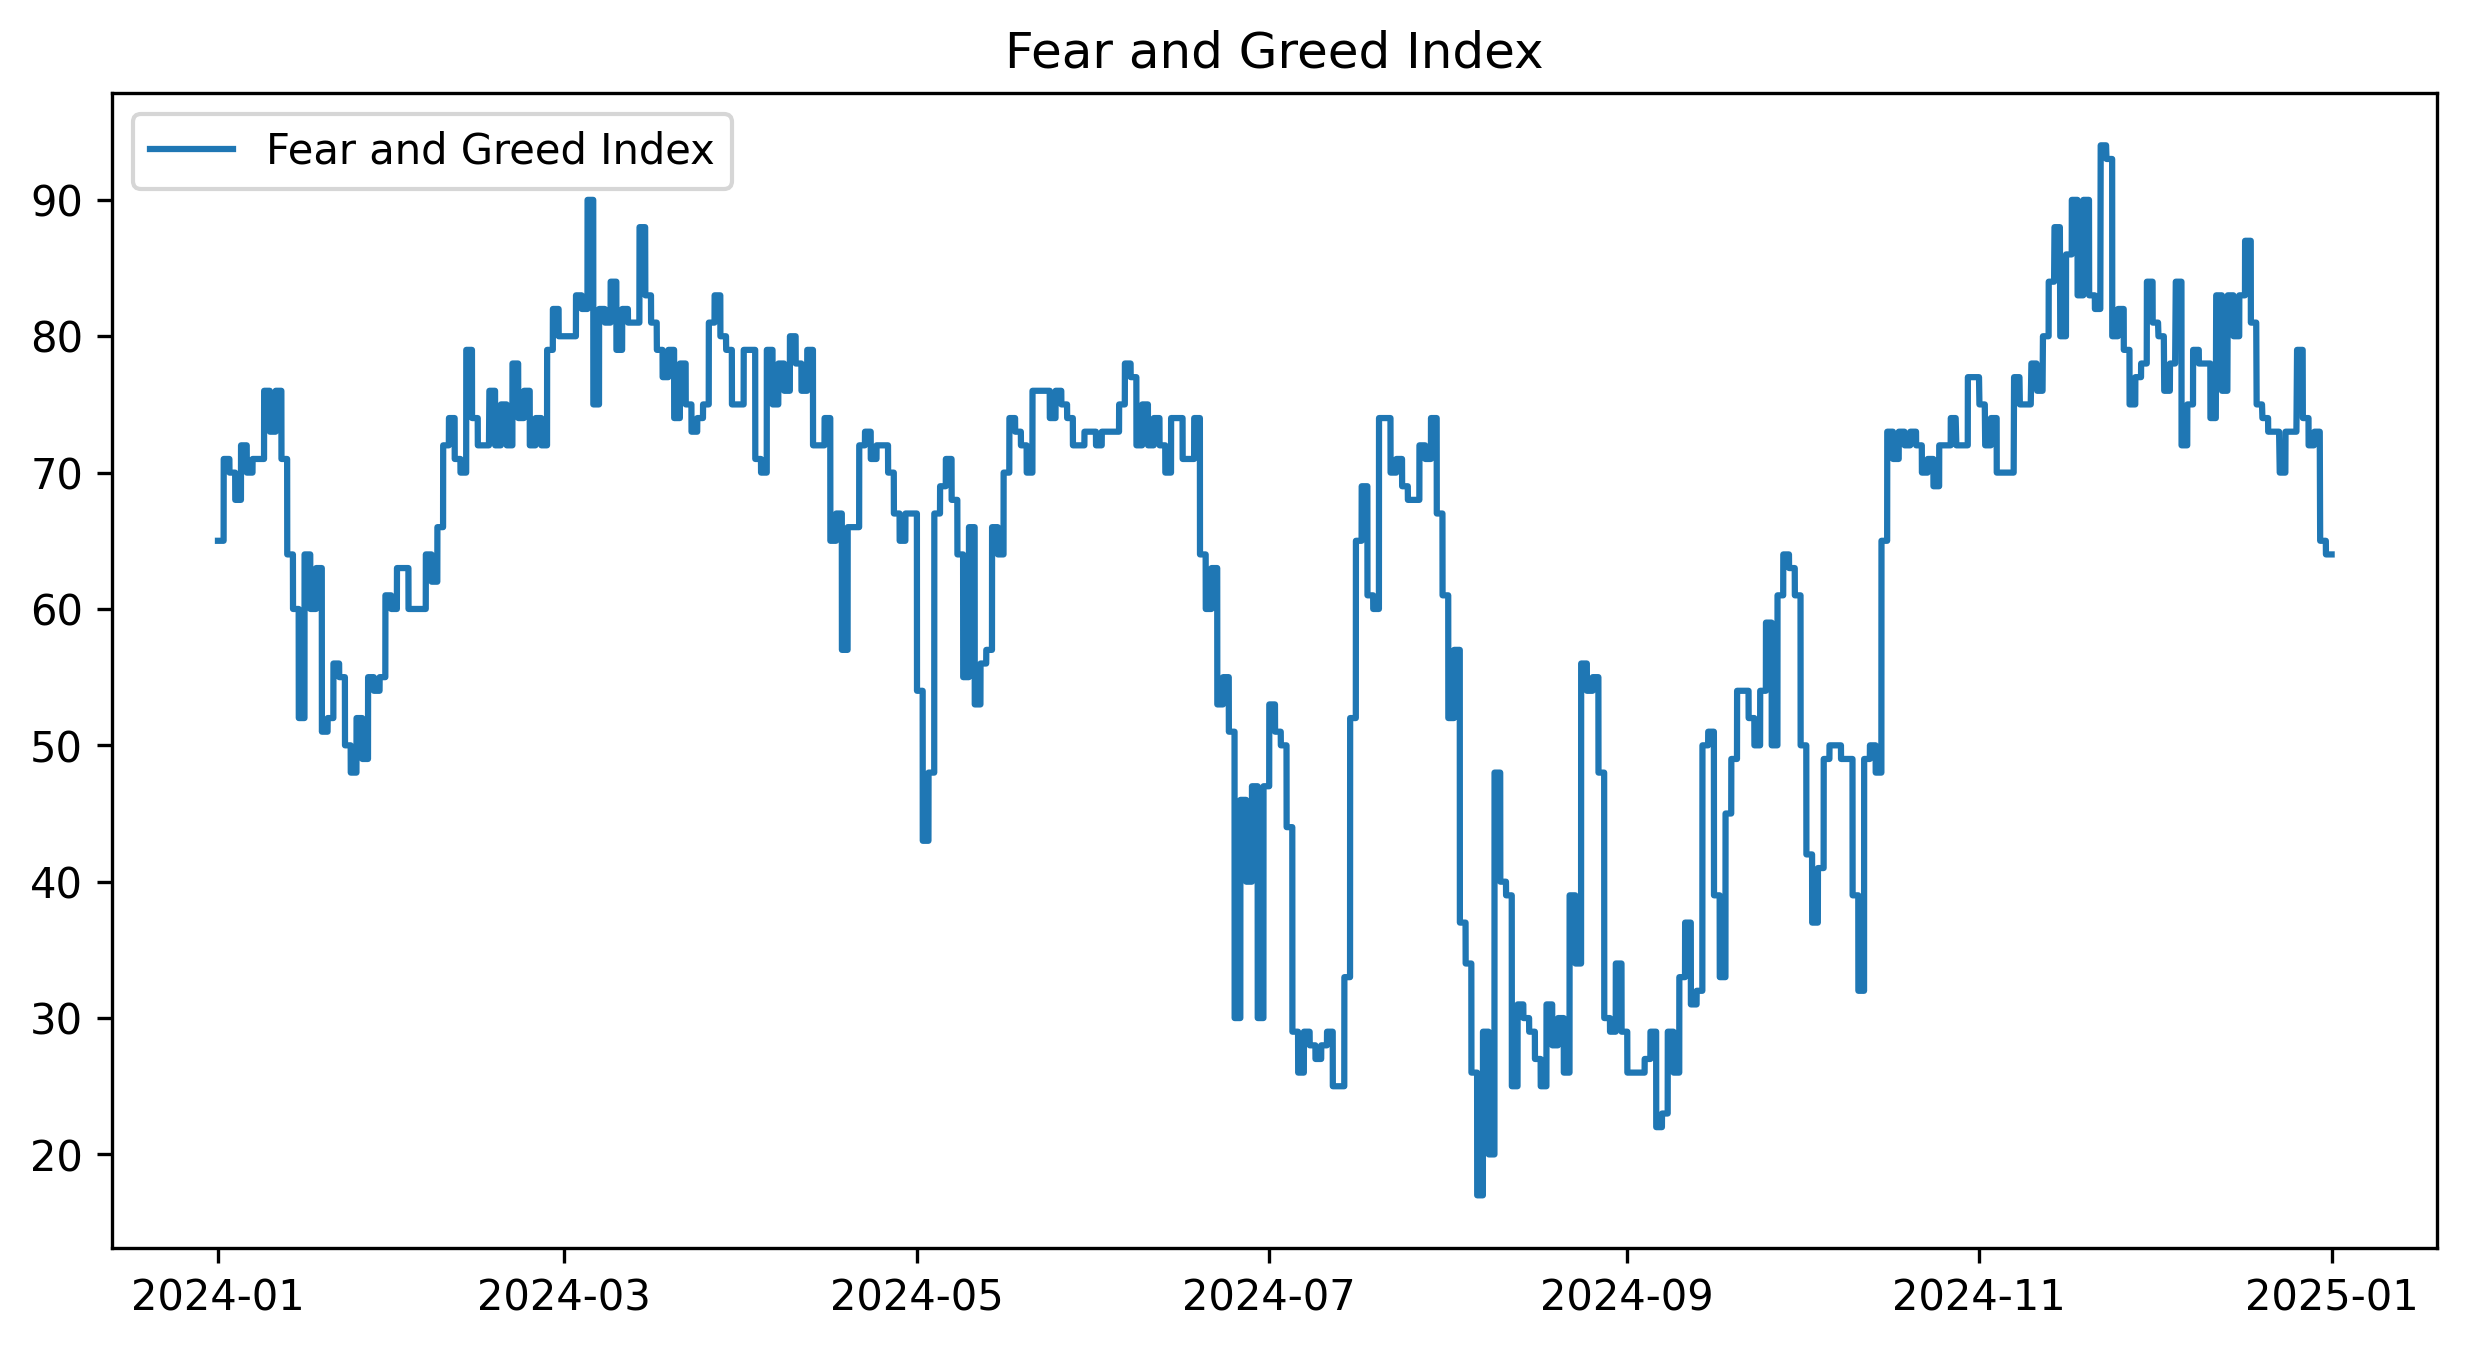

In [14]:
# Plot fear_n_greed_index
plt.figure(figsize=(10, 5))
plt.plot(df['fear_n_greed_index'], label='Fear and Greed Index')
plt.title('Fear and Greed Index')
plt.legend(loc='best')
plt.show()

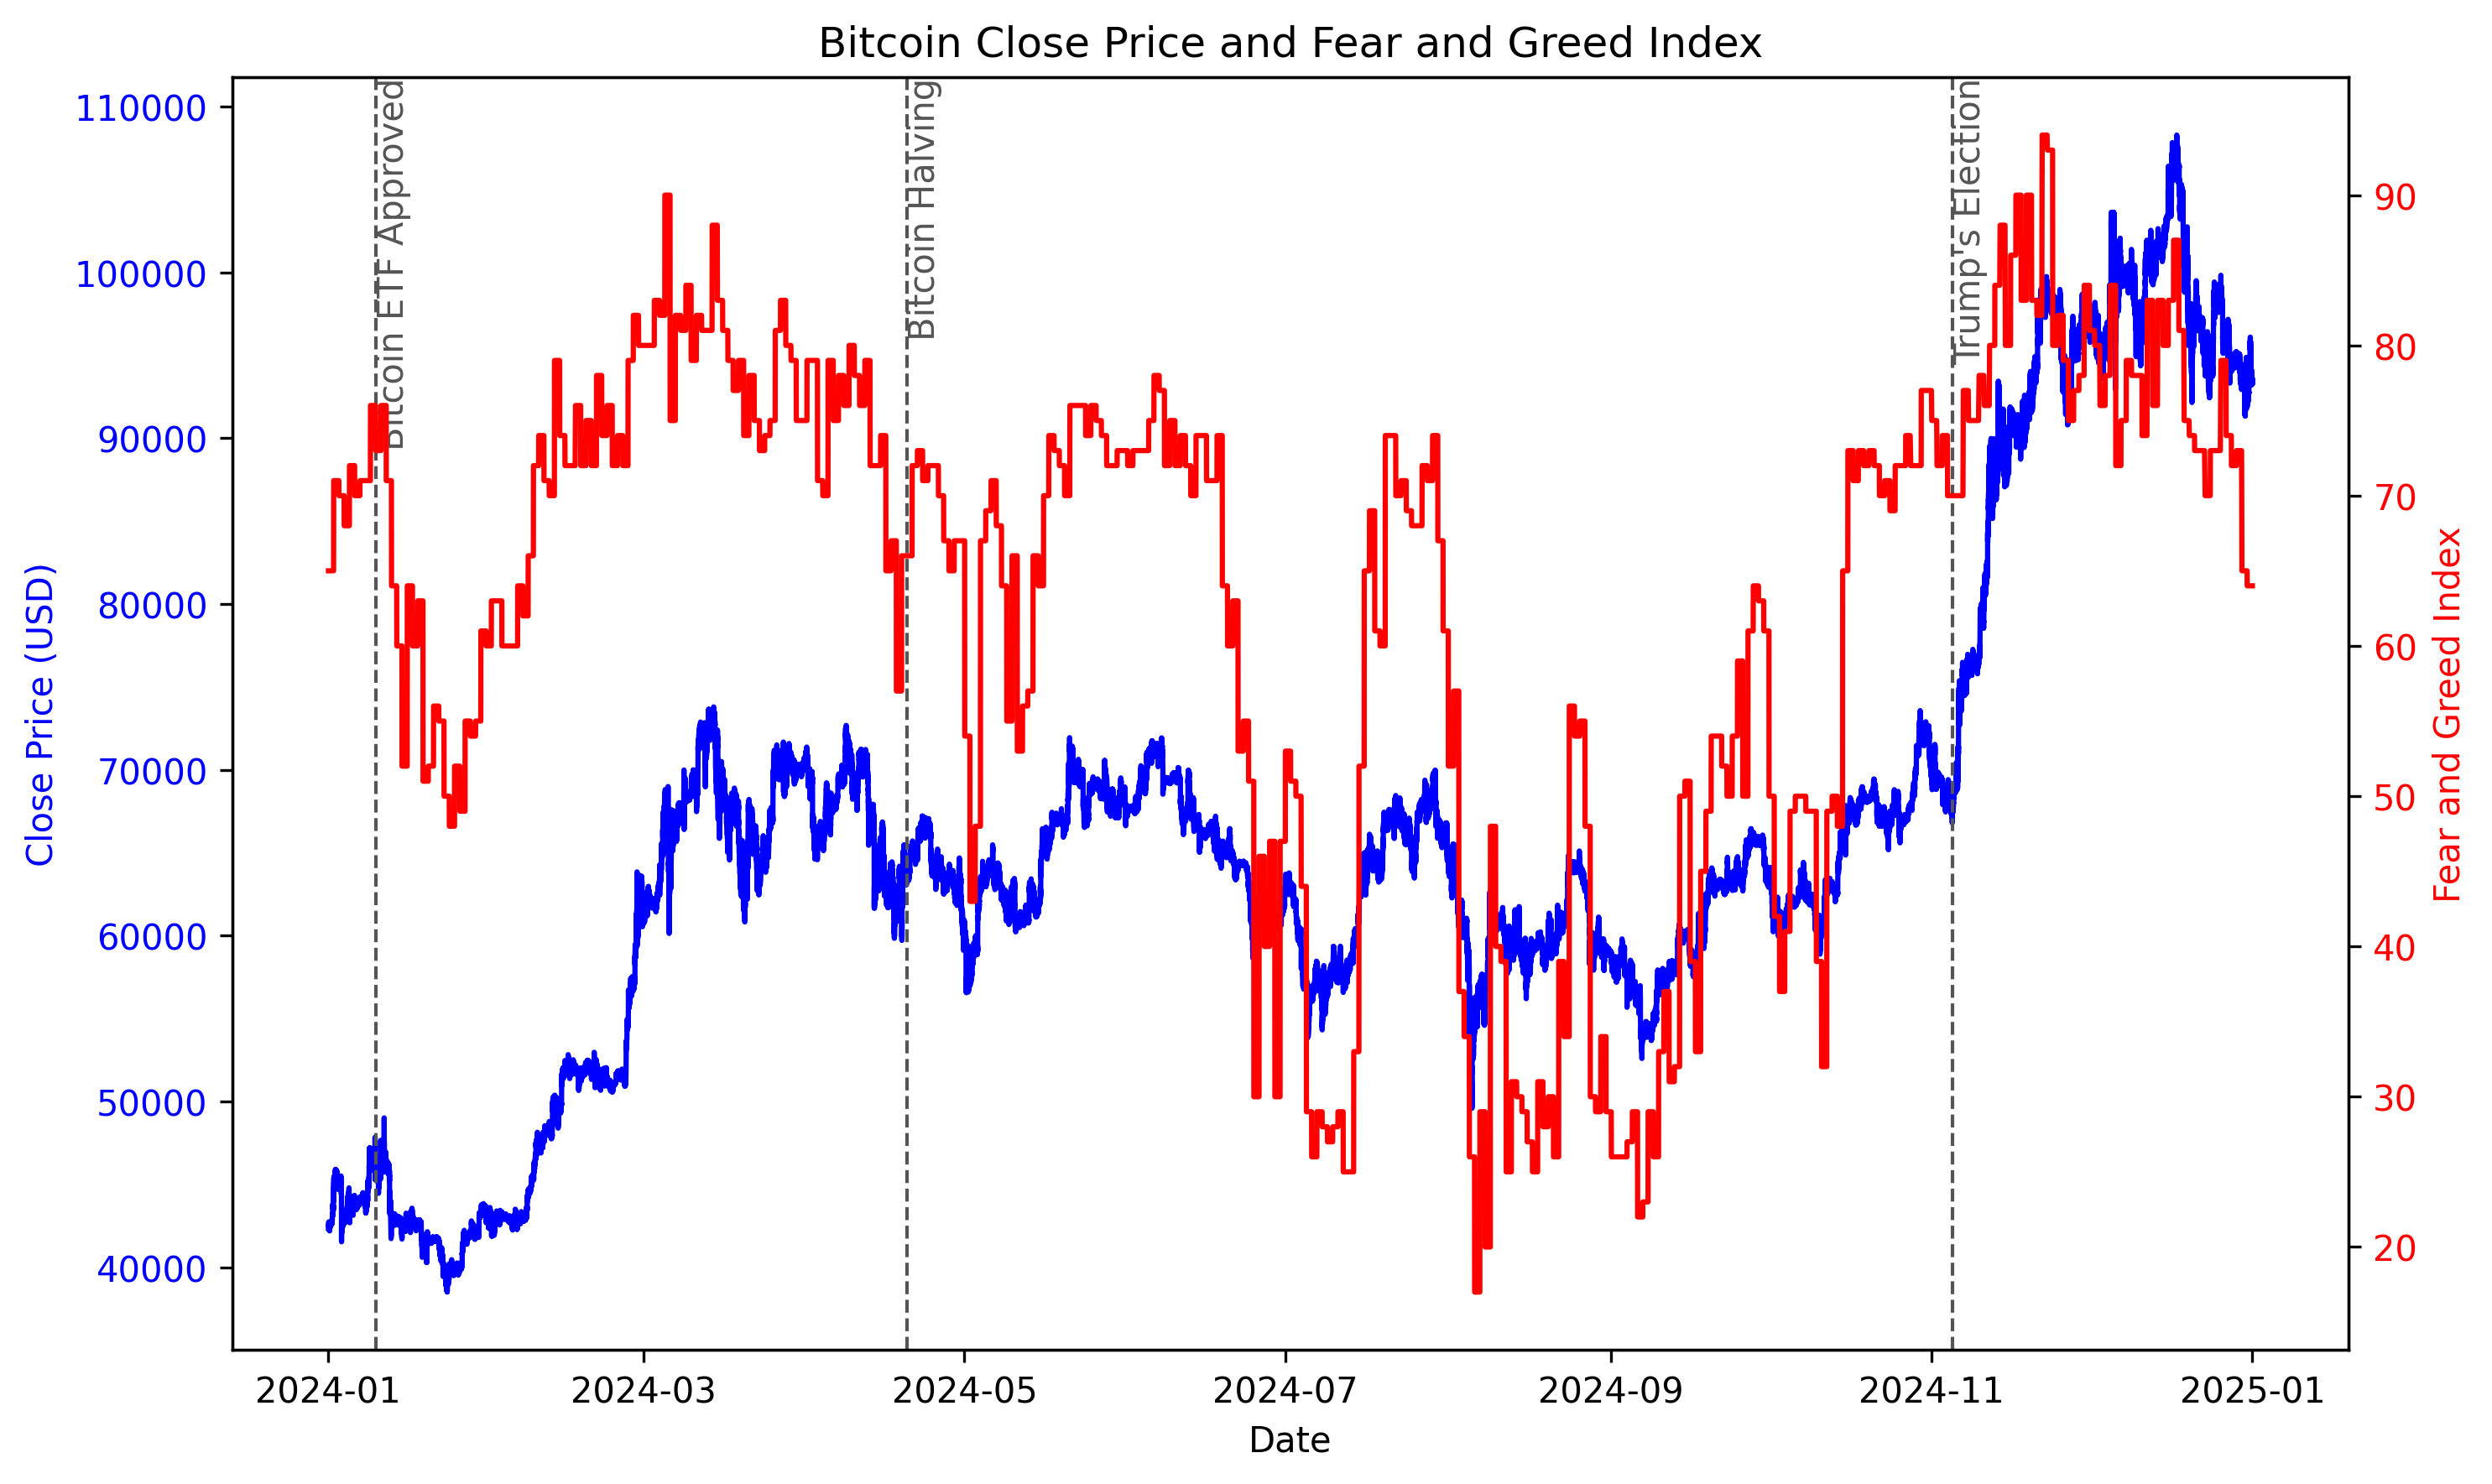

In [15]:
# Combine the two plots 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin close price on the primary y-axis
ax1.plot(df.index, df['Close'], color='blue', label='Bitcoin Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the Fear and Greed Index
ax2 = ax1.twinx()
ax2.plot(df.index, df['fear_n_greed_index'], color='red', label='Fear and Greed Index')
ax2.set_ylabel('Fear and Greed Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Key event dates
event_dates = ['2024-01-10', '2024-04-20', '2024-11-05']
event_labels = ['Bitcoin ETF Approved', 'Bitcoin Halving', "Trump's Election"]

# Add vertical dashed lines with labels
for date, label in zip(event_dates, event_labels):
    ax1.axvline(pd.to_datetime(date), color='#555555', linestyle='--', linewidth=1)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1], label, color='#555555', fontsize=10, rotation=90, verticalalignment='top')


# Add title and legends
plt.title('Bitcoin Close Price and Fear and Greed Index')
fig.tight_layout()
plt.show()

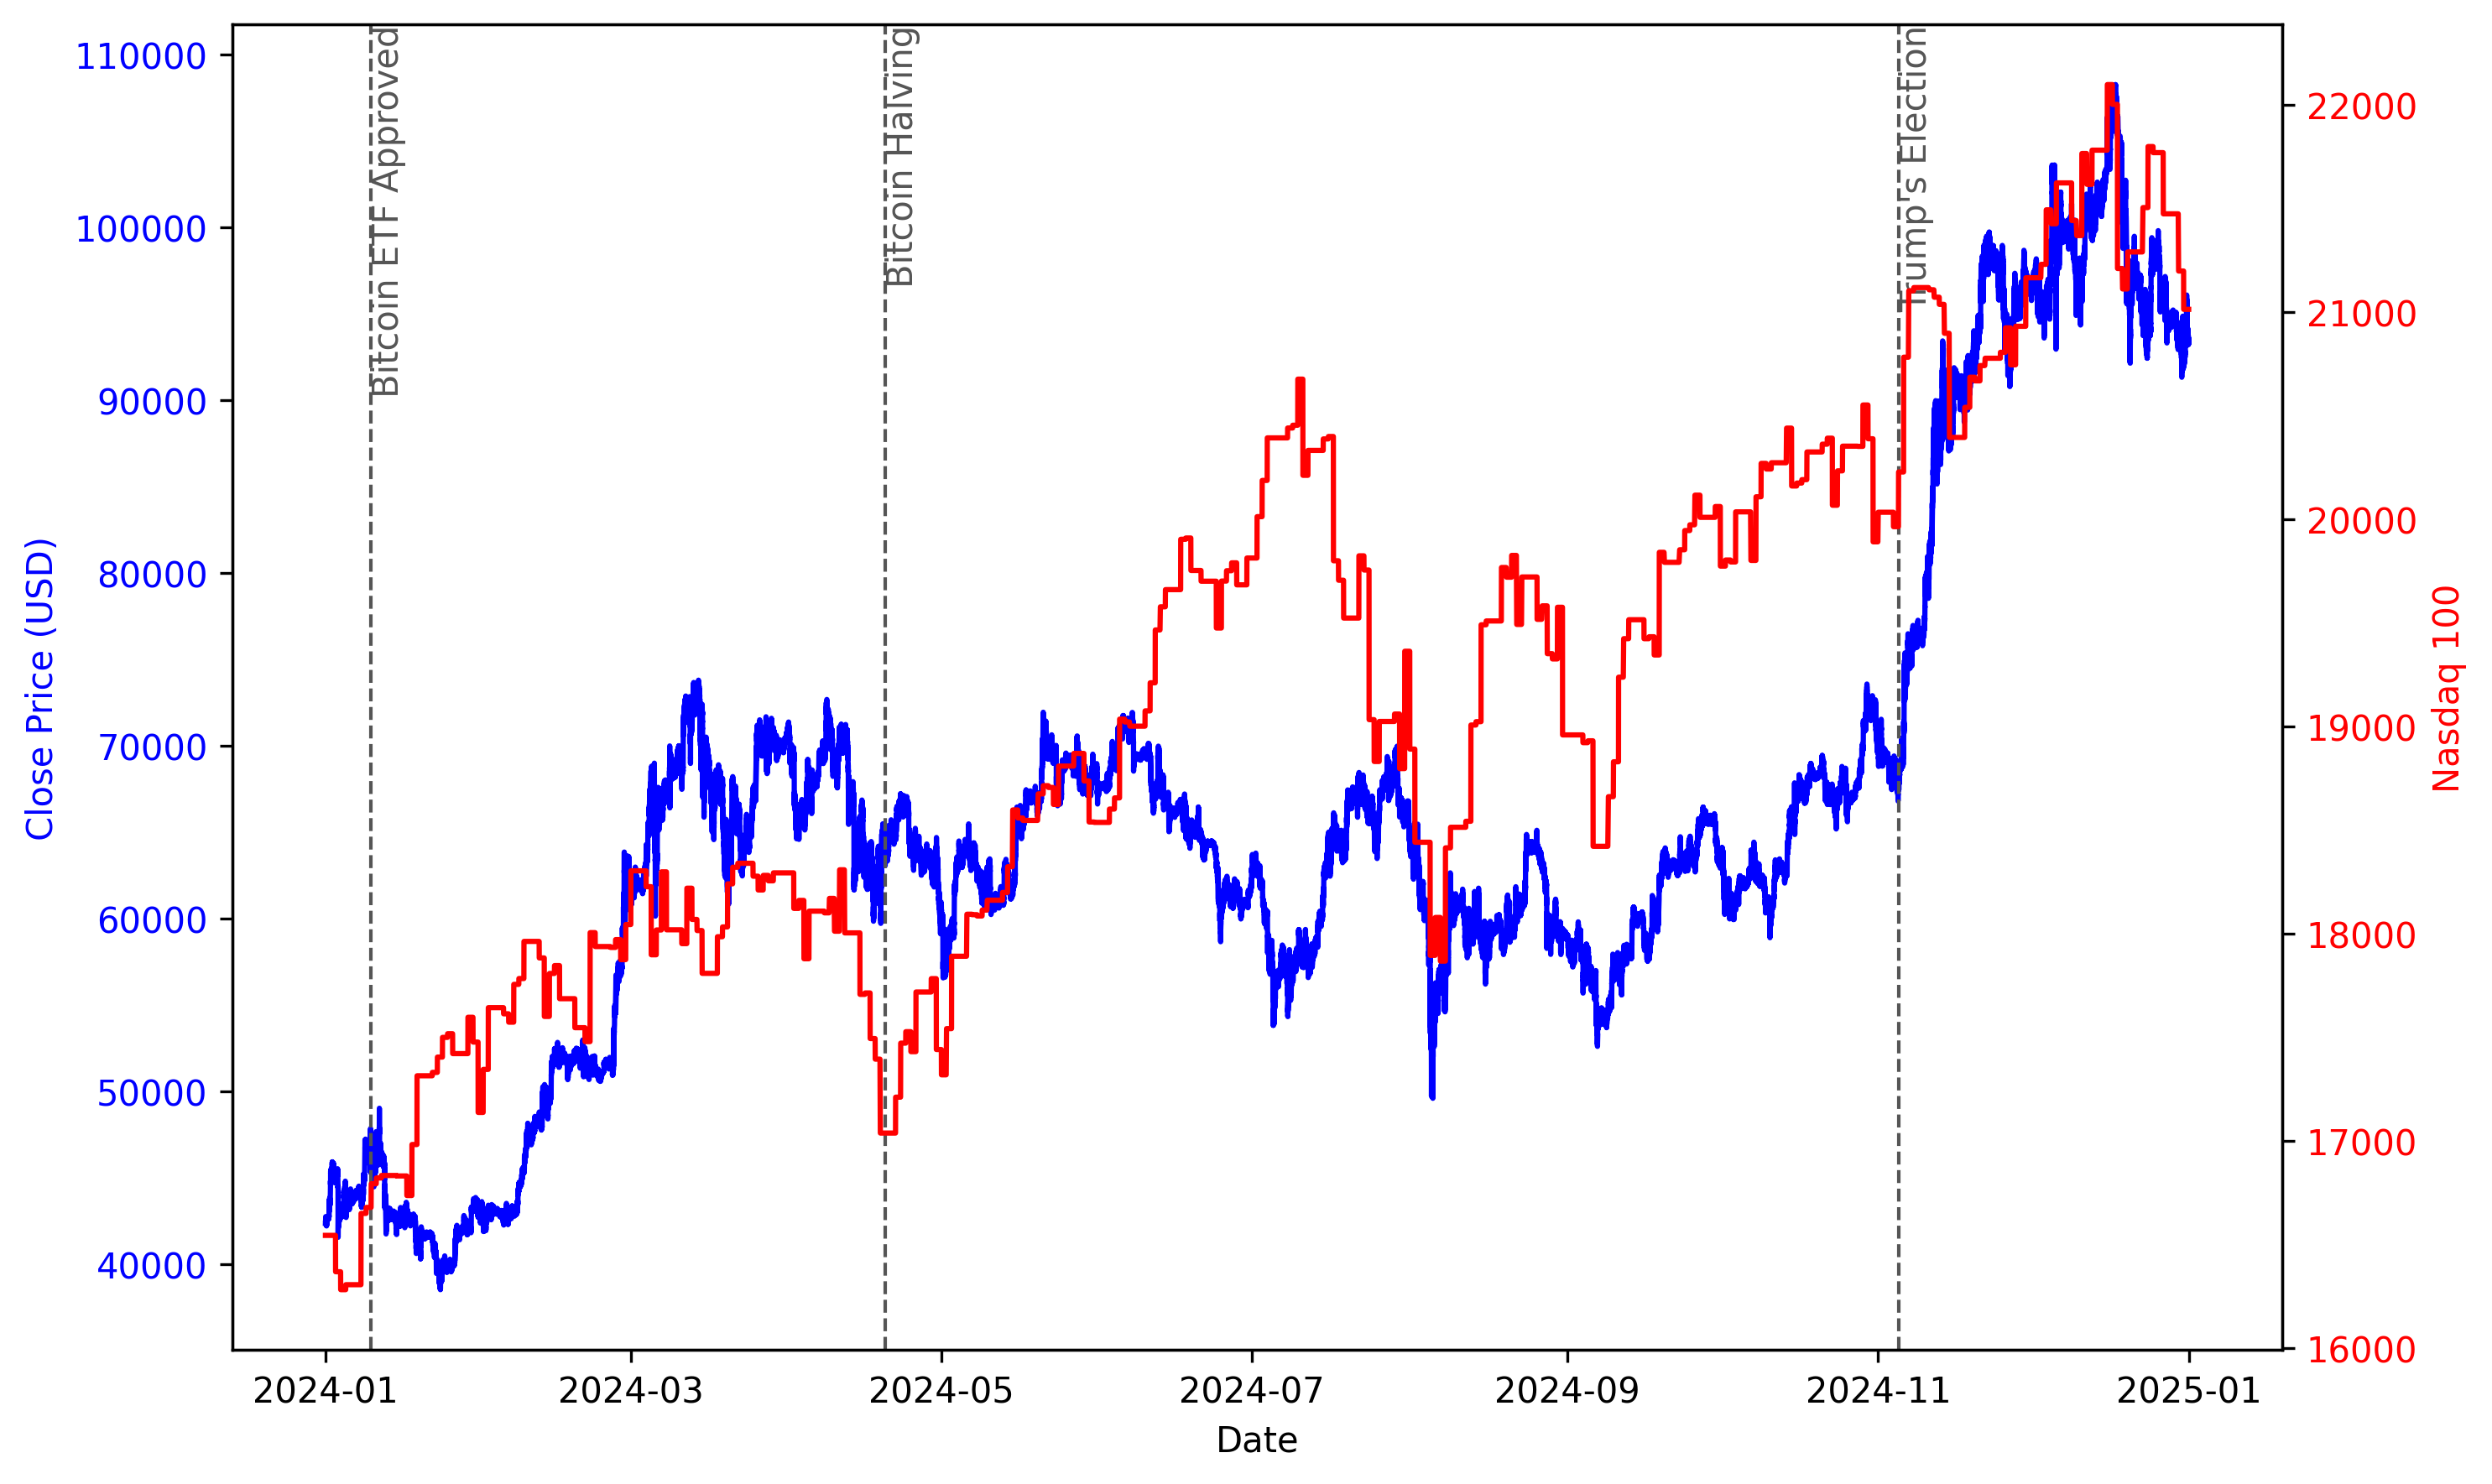

In [ ]:
# Plot Nasdaq100 and bitcoin close price

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin close price on the primary y-axis
ax1.plot(df.index, df['Close'], color='blue', label='Bitcoin Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the Nasdaq100
ax2 = ax1.twinx()
ax2.plot(df.index, df['Nasdaq100'], color='red', label='Nasdaq100')
ax2.set_ylabel('Nasdaq 100', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Key event dates
event_dates = ['2024-01-10', '2024-04-20', '2024-11-05']
event_labels = ['Bitcoin ETF Approved', 'Bitcoin Halving', "Trump's Election"]

# Add vertical dashed lines with labels
for date, label in zip(event_dates, event_labels):
    ax1.axvline(pd.to_datetime(date), color='#555555', linestyle='--', linewidth=1)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1], label, color='#555555', fontsize=10, rotation=90, verticalalignment='top')


# Add title and legends
# plt.title('Bitcoin Close Price and Nasdaq 100 Index')
fig.tight_layout()
plt.show()

In [ ]:
# Correlation between bitcoin close price and Nasdaq100
df['Close'].corr(df["Nasdaq100"])

0.7545111671512489

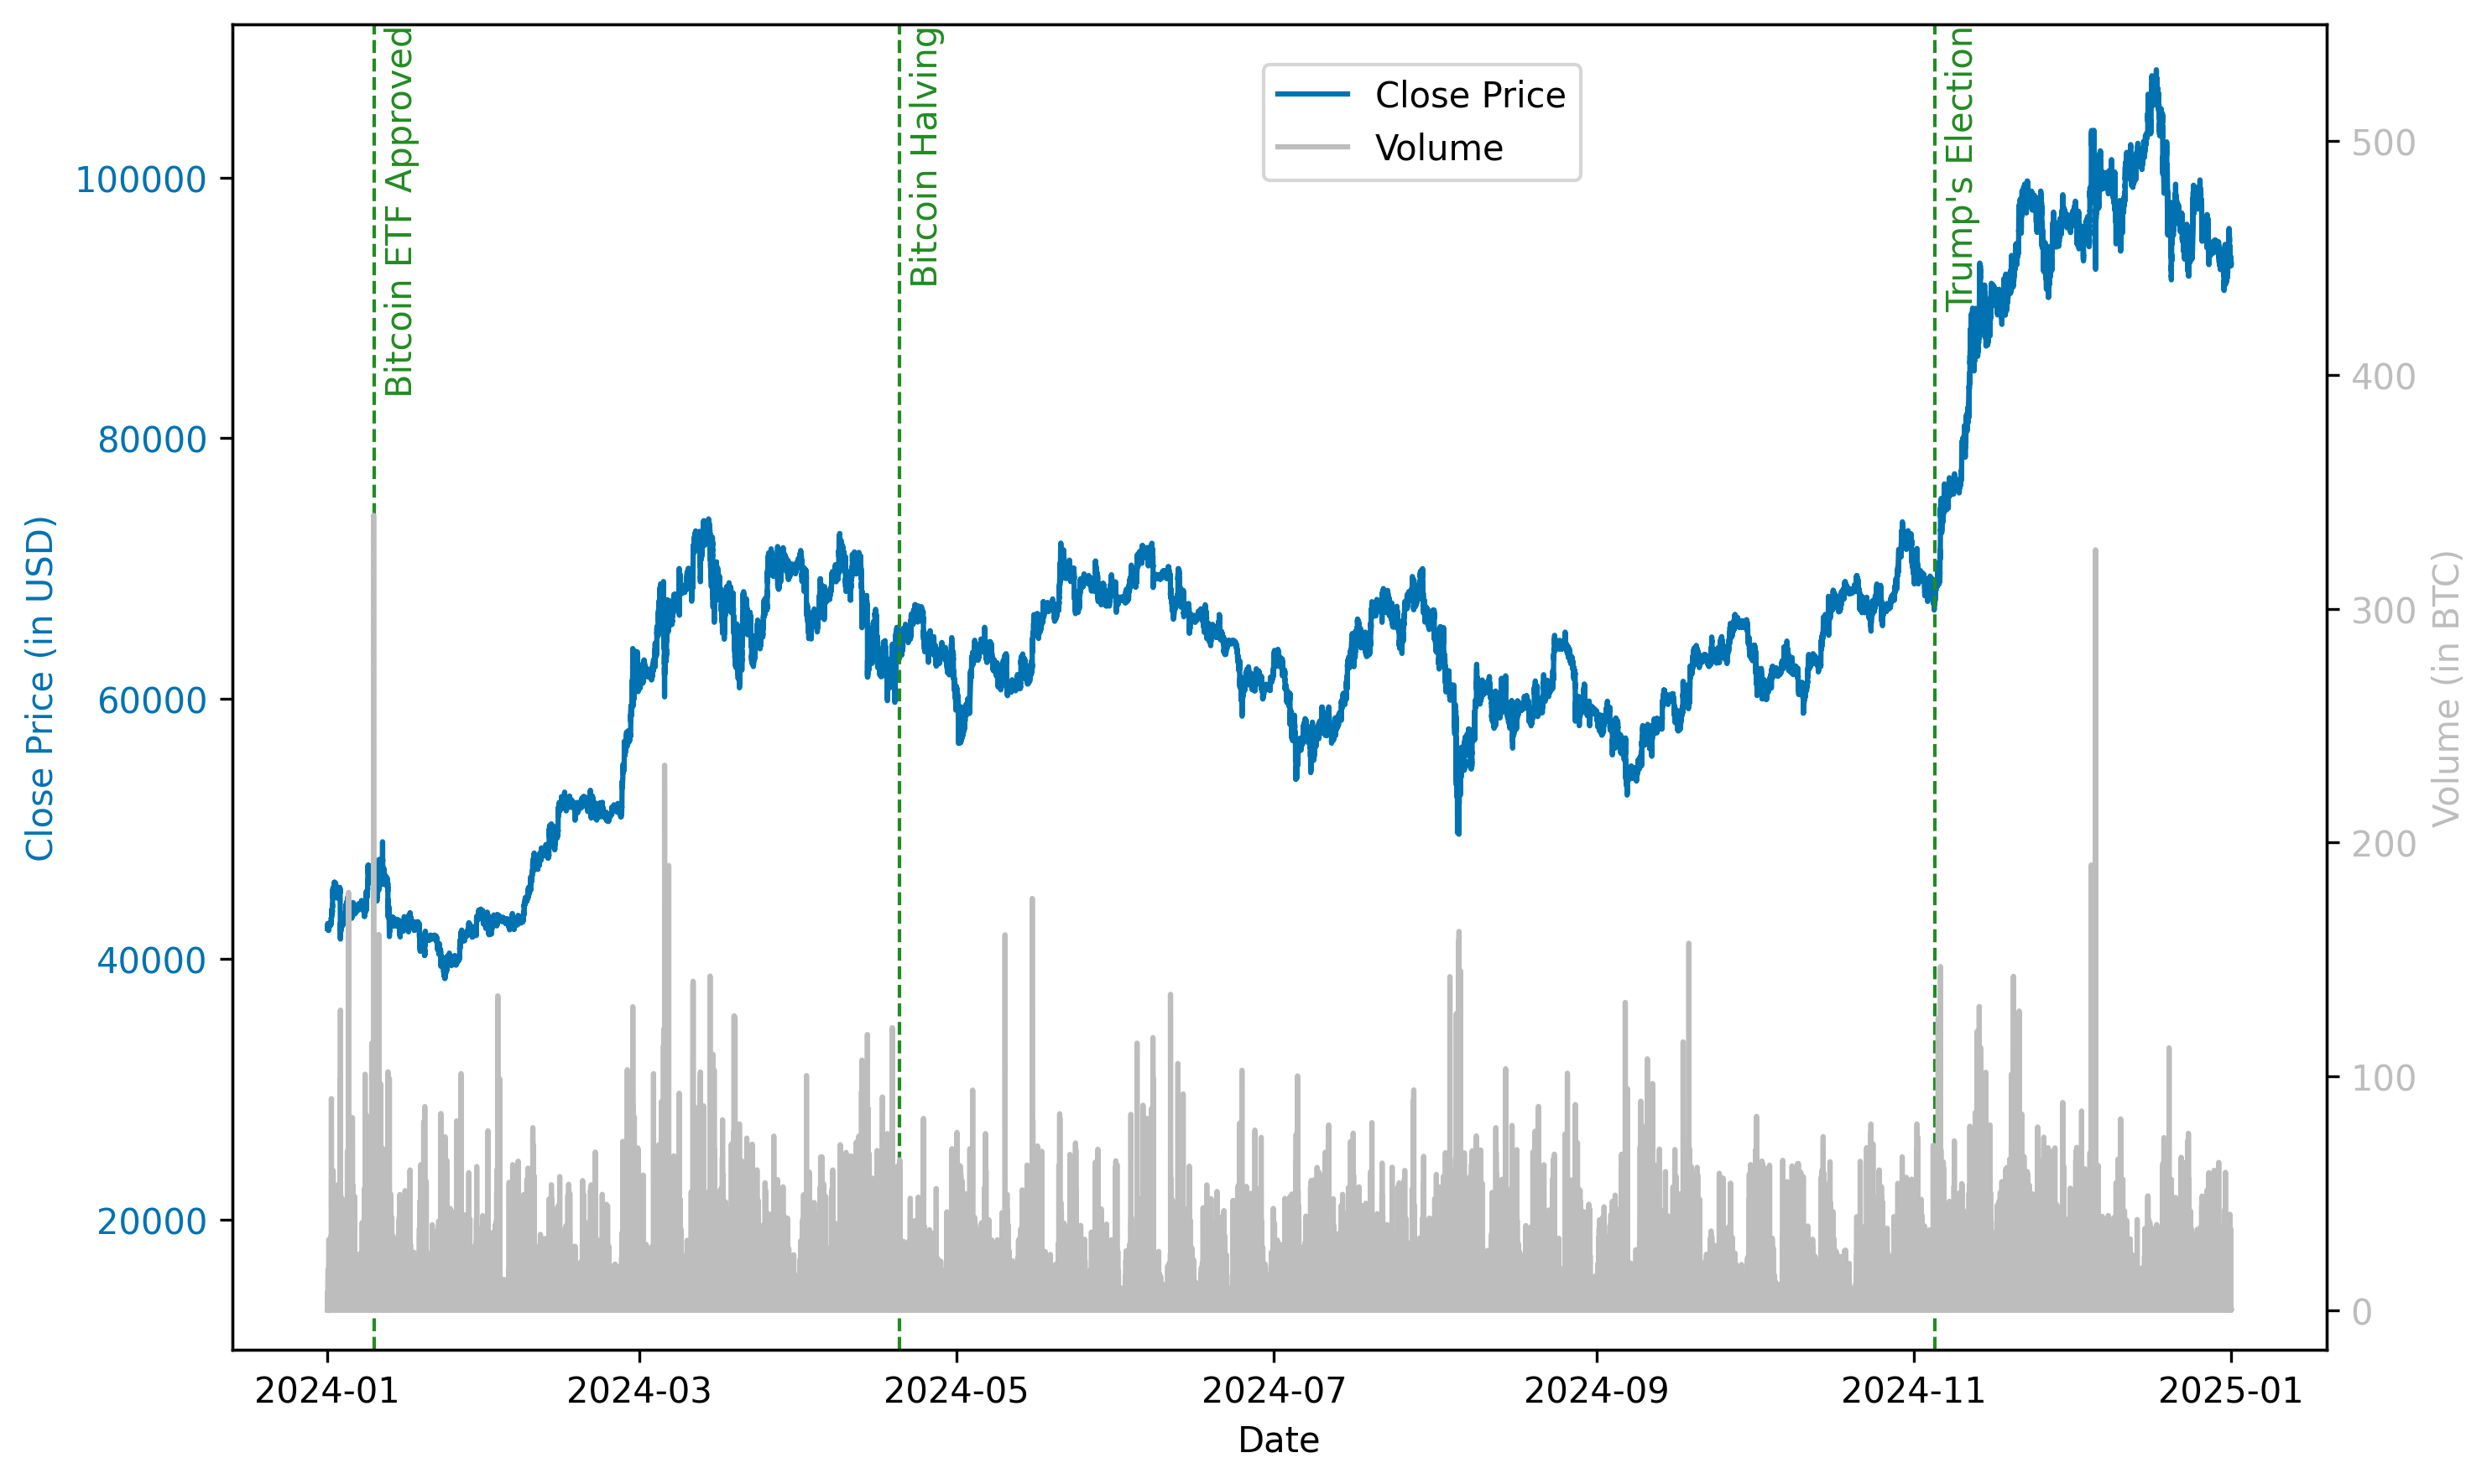

In [ ]:
from datetime import timedelta

# Plot volume and bitcoin close price
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bitcoin close price on the primary y-axis
ax1.plot(df.index, df['Close'], color='#0072B2', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (in USD)', color='#0072B2')
ax1.tick_params(axis='y', labelcolor='#0072B2')
ax1.set_ylim(bottom=10000) # Set a lower starting point for the Close Price y-axis

# Create a secondary y-axis for VolumeBTC 
ax2 = ax1.twinx()
ax2.plot(df.index, df['VolumeBTC'], color='#bdbdbd', label='Volume')
ax2.set_ylabel('Volume (in BTC)', color='#bdbdbd')
ax2.tick_params(axis='y', labelcolor='#bdbdbd')
ax2.set_ylim(top=550)

# Key event dates
event_dates = ['2024-01-10', '2024-04-20', '2024-11-05']
event_labels = ['Bitcoin ETF Approved', 'Bitcoin Halving', "Trump's Election"]

# Add vertical dashed lines with labels 
for date, label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(date)
    ax1.axvline(event_date, color='#228B22', linestyle='--', linewidth=1)
    ax1.text(event_date + timedelta(days=2),  # Shift label right by 2 days
             ax1.get_ylim()[1], 
             label, 
             color='#228B22', 
             fontsize=10, 
             rotation=90, 
             verticalalignment='top')

# Add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))
fig.tight_layout()
plt.show()

In [19]:
df['VolumeBTC'].describe()

count    509414.000000
mean          1.536753
std           5.084324
min           0.000000
25%           0.029574
50%           0.207975
75%           0.881257
max         339.941471
Name: VolumeBTC, dtype: float64

In [20]:
# df.to_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/Data/Bitcoin_data_2024_w_TI_n_Macro.csv")